In [1]:
import pandas as pd

# Task 1 Tic-Tac-Toe (part 1)
Hãy viết hàm kiểm tra ai là người thắng nếu đầu vào là 1 list lồng list biểu diễn cho ma trận cờ caro 3x3 nếu:
- 2 là ô có giá trị của người thứ 2
- 1 là ô có giá trị của người thứ 1
- 0 là ô rỗng chưa có ai đi

Ví dụ:
``````
[[1, 2, 0],
[2, 1, 0],
[2, 1, 1]] -> người thắng là số 1 (đường chéo)  -> return 1

[[1, 2, 0],
[2, 1, 0],
[2, 1, 2]] -> không ai thắng  -> return None

[[2, 2, 0],
[2, 1, 0],
[2, 1, 1]] -> người thắng là số 2  -> return 2
```

In [2]:
def check_winner(board):
    """"""
    # Start here
    df = pd.DataFrame(board)

    # Kiểm tra hàng và cột
    for i in range(3):
        if df.iloc[i, 0] == df.iloc[i, 1] == df.iloc[i, 2] != 0:
            return df.iloc[i, 0]
        if df.iloc[0, i] == df.iloc[1, i] == df.iloc[2, i] != 0:
            return df.iloc[0, i]

    # Kiểm tra đường chéo
    if df.iloc[0, 0] == df.iloc[1, 1] == df.iloc[2, 2] != 0:
        return df.iloc[0, 0]
    if df.iloc[0, 2] == df.iloc[1, 1] == df.iloc[2, 0] != 0:
        return df.iloc[0, 2]

    # Nếu không có người thắng, trả về None
    return "None"


In [40]:
check_winner([[1, 2, 0], [2, 1, 0], [2, 1, 1]])

1

In [29]:
check_winner([[1, 2, 0], [2, 1, 0], [2, 1, 2]])

'None'

In [23]:
check_winner([[2, 2, 0], [2, 1, 0], [2, 1, 1]])

2

# Task 2

## 1. Import dữ liệu

#### Thông tin chi tiết về dữ liệu
Dữ liệu bao gồm 20640 quan sát tương ứng với 8 trường thông tin đều ở dạng số:
- **MedInc**     : median income in block group
- **HouseAge**   : median house age in block group
- **AveRooms**   : average number of rooms per household
- **AveBedrms**  : average number of bedrooms per household
- **Population** : block group population
- **AveOccup**   : average number of household members
- **Latitude**   : block group latitude
- **Longitude**  : block group longitude
- **MedHouseVal**: median house value

<b>Mục tiêu của bài toán là sử dụng các dữ liệu lịch sử đã có để thể dự đoán cho giá một ngôi nhà (MedHouseVal)</b> $\rightarrow$ target variable sẽ là **MedHouseVal**

In [3]:
# Load data
file_path = 'california_housing.csv'

data = pd.read_csv(file_path)

print(data.head()) 


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


## 2. EDA

### Kiểm tra kiểu dữ liệu của các features

In [20]:
# Start here
# print(data.dtypes)
for column in data.columns:
    print(f"{column}: {data[column].dtype}")


MedInc: float64
HouseAge: float64
AveRooms: float64
AveBedrms: float64
Population: float64
AveOccup: float64
Latitude: float64
Longitude: float64
MedHouseVal: float64


### Kiểm tra số lượng missing value ở từng features

In [25]:
# Start here
missing_values = data.isnull().sum()
print(missing_values)

missing_features = missing_values[missing_values > 0]
if missing_features.empty:
    print("No missing values.")
else:
    print("Have missing values.")

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
No missing values.


Có cần:
- Correct kiểu dữ liệu
- Xử lý missing value
- ...

### Check các thông số thống kê mô tả cho các cột (mean, min, std, q1, q2, ...)

In [24]:
# Start here
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,3.629493,35.058824,5.323703,1.072150,1220.434641,2.707675,38.003064,-122.028513,1.905975
std,1.751868,13.823433,1.532974,0.300682,1021.872845,0.835593,0.644967,0.345285,0.918813
min,0.499900,2.000000,1.714286,0.571429,18.000000,1.437141,37.470000,-122.340000,0.394000
25%,2.396925,24.000000,4.516296,1.003835,653.500000,2.301612,37.690000,-122.240000,1.167000
50%,3.240150,36.000000,5.188220,1.050173,957.500000,2.618301,37.780000,-122.150000,1.794500
75%,4.601425,49.000000,5.956551,1.097295,1428.000000,2.963490,37.860000,-121.970000,2.401500
max,13.499000,52.000000,31.777778,9.703704,12203.000000,17.177700,40.060000,-119.780000,5.000010


### Tính hệ số tương quan cho toàn bộ các features

In [28]:
# Start here
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.134676,0.492282,-0.111300,0.157009,0.033332,-0.317837,-0.084353,0.778550
HouseAge,-0.134676,1.000000,-0.148625,-0.082208,-0.393814,-0.020737,-0.236231,-0.515487,0.043335
AveRooms,0.492282,-0.148625,1.000000,0.653572,-0.015362,0.001640,0.069004,0.292076,0.306149
AveBedrms,-0.111300,-0.082208,0.653572,1.000000,-0.060839,-0.067475,0.120402,0.215200,-0.116673
Population,0.157009,-0.393814,-0.015362,-0.060839,1.000000,0.144495,-0.062744,0.042917,0.146579
AveOccup,0.033332,-0.020737,0.001640,-0.067475,0.144495,1.000000,-0.060444,0.016258,-0.082062
Latitude,-0.317837,-0.236231,0.069004,0.120402,-0.062744,-0.060444,1.000000,0.508645,-0.437292
Longitude,-0.084353,-0.515487,0.292076,0.215200,0.042917,0.016258,0.508645,1.000000,-0.288610
MedHouseVal,0.778550,0.043335,0.306149,-0.116673,0.146579,-0.082062,-0.437292,-0.288610,1.000000


Câu hỏi: 
- có feature nào có tương quan tuyến tính tốt với MedHouseVal không ?
- các feature có hệ số tệ thì có nên bỏ hay không ?
- các features có phụ thuộc lẫn nhau không ?

### Các facts có thể đúng:
- Income cao thì có nhu cầu mua nhà có giá cao
- Nhà có số lượng phòng\phòng ngủ nhiều thì giá cũng sẽ cao hơn
- ...

#### Hãy thử sử dụng chart để kiểm tra xem các nhận định trên có đúng không ?

Hint: lineplot, regplot, relplot, ...

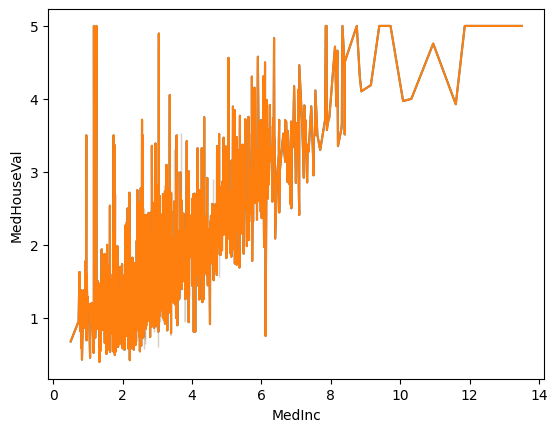

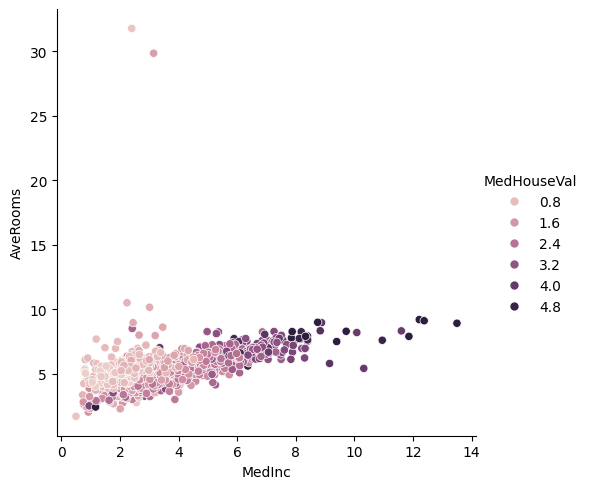

In [4]:
# Start here
# Vẽ chart nhưng ko hiểu =)))
import seaborn as sns

sns.lineplot(data=data, x='MedInc', y='MedHouseVal')
sns.lineplot(data=data, x='MedInc', y='MedHouseVal')
sns.relplot(data=data, x='MedInc', y='AveRooms', hue='MedHouseVal')

## 3. Model development

### 3.1 Sử dụng các features sinh viên nhận định quan trọng để xây dựng mô hình dự đoán cho MedHouseVal

In [5]:
# Lựa chọn features
from sklearn.model_selection import train_test_split  # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.preprocessing import StandardScaler  # Chuẩn hóa dữ liệu
from sklearn.linear_model import LinearRegression  # Mô hình hồi quy tuyến tính
from sklearn.pipeline import Pipeline  # Sử dụng pipeline để ghép nối các bước

# Tách dữ liệu thành feature (X) và target (y)
X = data.drop(columns=['MedHouseVal'])  # Các đặc trưng
y = data['MedHouseVal']  # Biến mục tiêu

# Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo pipeline với các bước: chuẩn hóa và hồi quy tuyến tính
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Bước chuẩn hóa dữ liệu
    ('regressor', LinearRegression())  # Bước huấn luyện mô hình hồi quy
])

# Huấn luyện mô hình trên dữ liệu huấn luyện
pipeline.fit(X_train, y_train)

# Dự đoán giá trị của tập kiểm tra
y_pred = pipeline.predict(X_test)



### 3.2 Chia dữ liệu thành 2 phần:
Yêu cầu: 80% record đầu -> train set, 20% records còn lại -> test set. Sau đó tạo 4 biến:
- X_train: các features trong tập 80%
- y_train: trường price của tập 80%
- X_test: các selected features trong tập 20%
- y_test: trường price của tập 20%

Có thể sử dụng pandas để filter hoặc các hàm có sẵn

In [6]:
# Start here
train_size = int(0.8 * len(data))

# Chia dữ liệu
train_data = data[:train_size]  # 80% đầu là training set
test_data = data[train_size:]   # 20% còn lại là test set

# Tạo các biến X_train, y_train, X_test, y_test
X_train = train_data.drop(columns=['MedHouseVal'])  # Các features trong tập train
y_train = train_data['MedHouseVal']  # Trường giá trị trong tập train
# X_train, y_train là tập dữ liệu huấn luyện, chứa các đặc trưng và giá trị mục tiêu.

X_test = test_data.drop(columns=['MedHouseVal'])  # Các features trong tập test
y_test = test_data['MedHouseVal']  # Trường giá trị trong tập test
# X_test, y_test là tập dữ liệu kiểm tra, cũng chứa các đặc trưng và giá trị mục tiêu tương ứng.

### 3.3 Xây dựng mô hình

#### Sử dụng thuật toán Linear Regression và huấn luyện trên bộ dữ liệu train

In [ ]:
# Start here


#### Dự đoán với dữ liệu trên tập test -> y_predicted

In [ ]:
# Start here


### 3.4 Đánh giá mô hình
#### Vẽ distribution plot giữa y_test và y_predicted

In [ ]:
# Start here


# END!